# All-NBA Classifier

First of all, I will focus on All-NBA team predictions but my analyst will also consider All-Defensive and All-Rookie teams.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
nba_data = pd.read_csv(r'C:\Users\tomai\PROJECTS\Portfolio-\nba_data.csv').drop('Unnamed: 0',axis=1)

In [3]:
nba_data

,age,experience,tm,g,gs,mp_per_game,fg_per_game,fga_per_game,x3p_per_game,x3pa_per_game,...,fga_blocked,All-Defense,All-NBA,All-Rookie,playoffs,w,l,o_rtg,d_rtg,player_year
0,26.0,8,DEN,75,75.0,31.7,5.8,11.1,1.2,3.5,...,52,0.0,0.0,0.0,True,48.0,34.0,114.5,112.1,Aaron Gordon 2022
1,29.0,10,DEN,67,18.0,22.1,2.2,5.2,1.2,3.4,...,13,0.0,0.0,0.0,True,48.0,34.0,114.5,112.1,Austin Rivers 2022
2,22.0,3,DEN,14,0.0,5.8,1.1,1.9,0.1,0.3,...,1,0.0,0.0,0.0,True,48.0,34.0,114.5,112.1,Bol Bol 2022
3,21.0,1,DEN,69,4.0,19.0,3.3,8.3,1.9,5.2,...,38,0.0,0.0,1.0,True,48.0,34.0,114.5,112.1,Bones Hyland 2022
4,28.0,6,DEN,35,1.0,17.4,2.9,6.9,1.7,4.1,...,13,0.0,0.0,0.0,True,48.0,34.0,114.5,112.1,Bryn Forbes 2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12269,26.0,1,MIN,43,0.0,5.5,0.6,2.3,0.5,1.5,...,8,0.0,0.0,0.0,True,40.0,42.0,105.5,107.1,Shane Heal 1997
12270,19.0,1,MIN,67,64.0,34.7,5.3,13.0,1.5,4.3,...,92,0.0,0.0,1.0,True,40.0,42.0,105.5,107.1,Stephon Marbury 1997
12271,33.0,3,MIN,53,35.0,14.5,1.5,2.6,0.0,0.0,...,12,0.0,0.0,0.0,True,40.0,42.0,105.5,107.1,Stojko Vranković 1997
12272,33.0,12,MIN,82,20.0,19.1,2.3,5.5,0.8,2.4,...,15,0.0,0.0,0.0,True,40.0,42.0,105.5,107.1,Terry Porter 1997


# Classifier

In [4]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import train_test_split

In [6]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

X = nba_data.drop(['All-NBA','tm','player_year'],axis=1).values
y = nba_data['All-NBA'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
scaler = MinMaxScaler()

In [7]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=15)

In [9]:
nn_model = Sequential()

nn_model.add(Dense(43,activation='relu'))
nn_model.add(Dense(21,activation='relu'))
nn_model.add(Dense(10,activation='relu'))
#nn_model.add(Dense(5,activation='relu'))
nn_model.add(Dense(1,activation='sigmoid'))

nn_model.compile(loss='binary_crossentropy',optimizer='adam')

In [10]:
nn_model.fit(x=X_train,y=y_train,epochs=100,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/100
269/269 [==============================] - 2s 4ms/step - loss: 0.1280 - val_loss: 0.0464
Epoch 2/100
269/269 [==============================] - 1s 2ms/step - loss: 0.0440 - val_loss: 0.0443
Epoch 3/100
269/269 [==============================] - 1s 2ms/step - loss: 0.0404 - val_loss: 0.0388
Epoch 4/100
269/269 [==============================] - 1s 2ms/step - loss: 0.0390 - val_loss: 0.0373
Epoch 5/100
269/269 [==============================] - 1s 2ms/step - loss: 0.0389 - val_loss: 0.0424
Epoch 6/100
269/269 [==============================] - 1s 2ms/step - loss: 0.0382 - val_loss: 0.0373
Epoch 7/100
269/269 [==============================] - 1s 2ms/step - loss: 0.0376 - val_loss: 0.0372
Epoch 8/100
269/269 [==============================] - 1s 3ms/step - loss: 0.0363 - val_loss: 0.0386
Epoch 9/100
269/269 [==============================] - 1s 2ms/step - loss: 0.0359 - val_loss: 0.0399
Epoch 10/100
269/269 [==============================] - 1s 2ms/step - loss: 0.0363 - val_lo

116/116 [==============================] - 0s 1ms/step


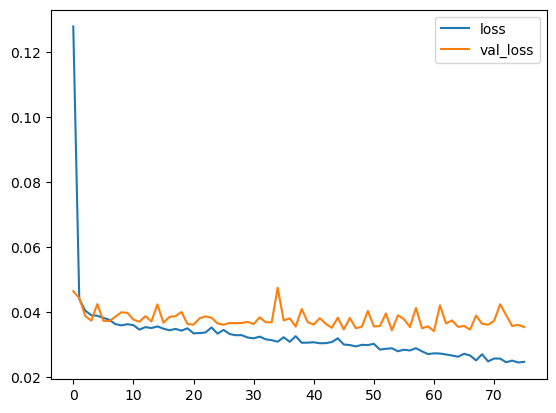

In [11]:
model_loss = pd.DataFrame(nn_model.history.history).plot()
nn_preds = (nn_model.predict(X_test)>0.5)*1

In [12]:
print(classification_report(y_test,nn_preds))
print(confusion_matrix(y_test,nn_preds))      

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      3598
         1.0       0.69      0.69      0.69        85

    accuracy                           0.99      3683
   macro avg       0.84      0.84      0.84      3683
weighted avg       0.99      0.99      0.99      3683

[[3571   27]
 [  26   59]]


This model tends to have more instances of overshooting, meaning it incorrectly assigns more observations to the positive class (All-NBA), but it also tends to guess the positive class more frequently. This indicates a tendency towards more confident but often erroneous predictions compared to the Random Forest model.